 Breast Cancer Prediction using UC Irvine ML Repository Dataset

In [1]:
# 1. Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [3]:
# 2. Loading the dataset

In [15]:
data = pd.read_csv('breast-cancer-wisconsin.csv', header=None)

In [16]:
columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
           'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
           'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
           'symmetry_worst', 'fractal_dimension_worst']

In [17]:
data.columns = columns

In [18]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# 3. Data Cleaning
# Check for missing values and handle them if any
data.isnull().sum()  # Identify any missing values
data.dropna(inplace=True)  # Drop rows with missing values (if any)

In [20]:
# Drop unnecessary columns (e.g., ID column)
data.drop(columns=['id'], inplace=True)

In [21]:
# Convert the diagnosis column to binary (Malignant: 1, Benign: 0)
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [22]:
# 4. Exploratory Data Analysis (EDA)
# Check the distribution of the target variable
print(data['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [23]:
# Check the summary statistics of the dataset
print(data.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

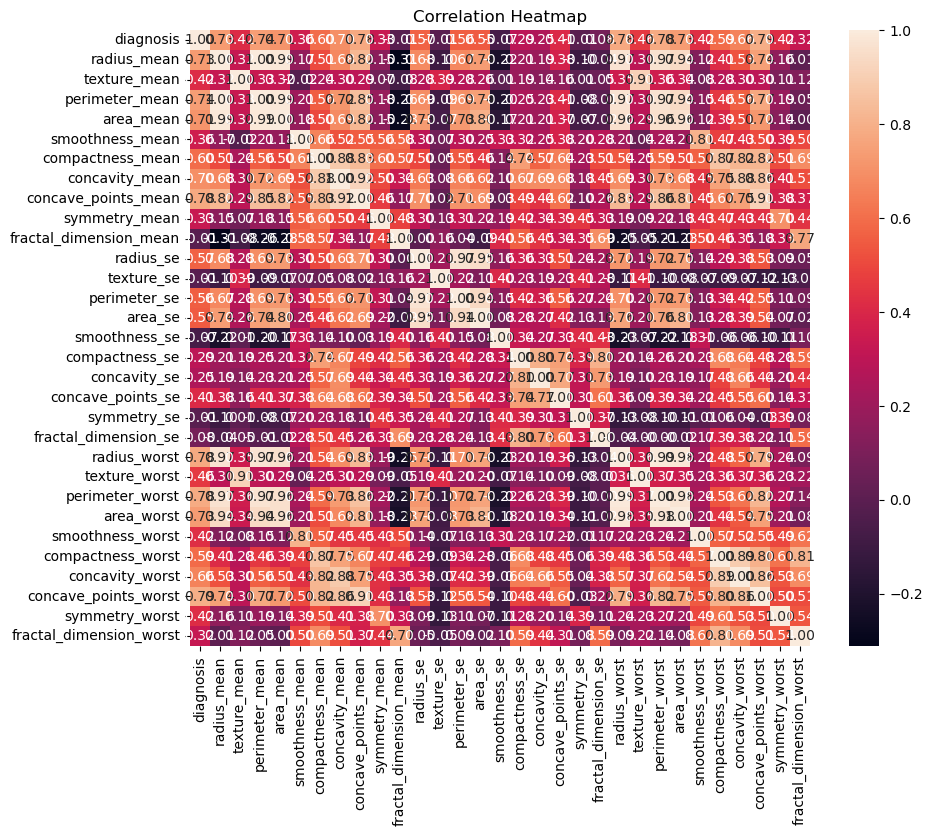

In [24]:
# 5. Data Visualization
# Correlation heatmap to visualize the relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

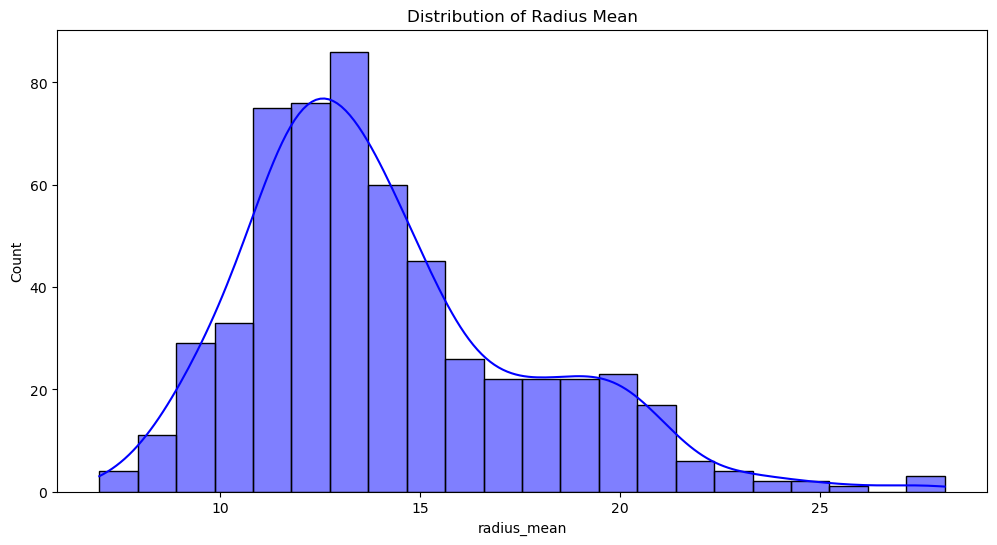

In [25]:
# Visualize the distribution of some key features
plt.figure(figsize=(12, 6))
sns.histplot(data['radius_mean'], kde=True, color='blue')
plt.title('Distribution of Radius Mean')
plt.show()

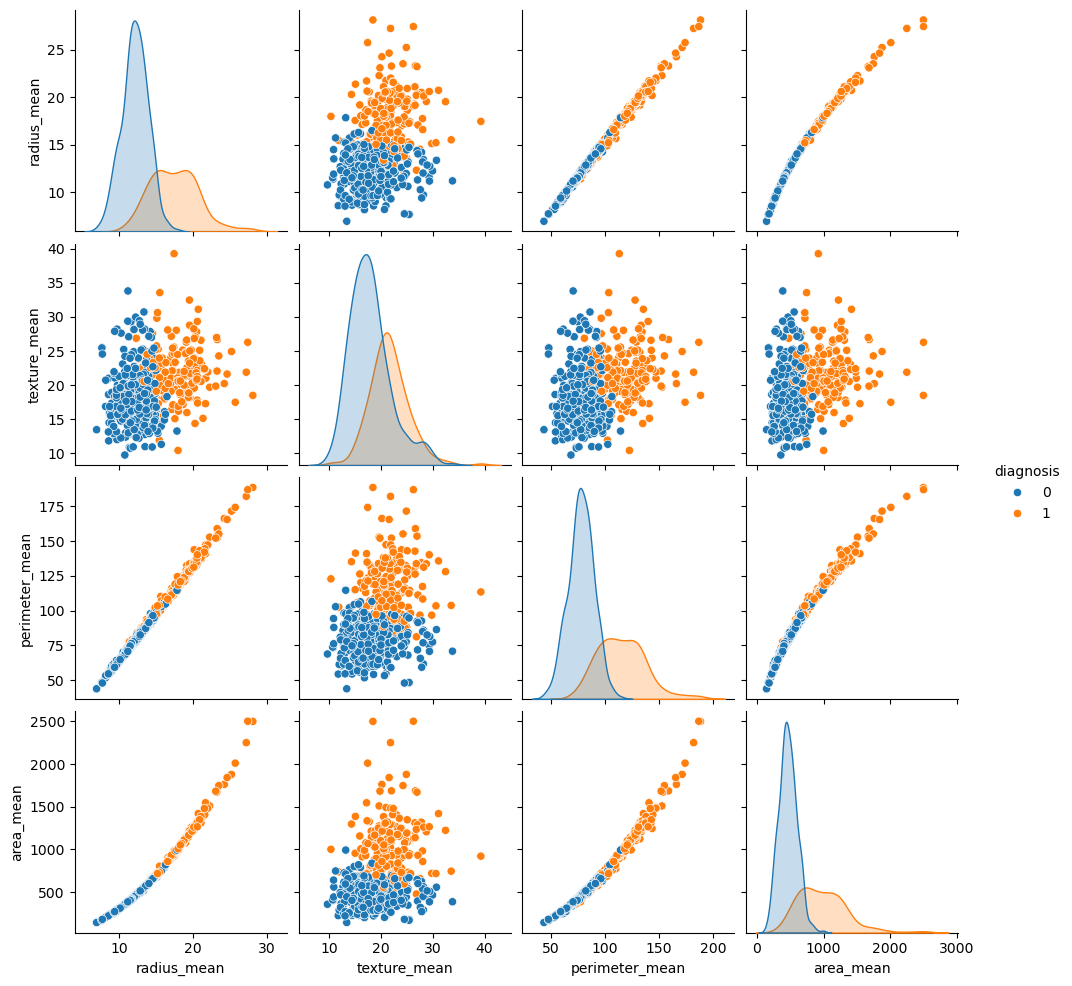

In [26]:
# Pairplot to visualize relationships between features
sns.pairplot(data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.show()

In [27]:
# 6. Data Preprocessing
# Separate features and target variable
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']  # Target variable

In [28]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# 7. Model Training
# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [31]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# 8. Model Evaluation
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [33]:
# Evaluate the model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9649122807017544
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
# 9. Hyperparameter Tuning using GridSearchCV
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [35]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [36]:
# Perform the hyperparameter tuning
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [37]:
# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [38]:
# Train the final model with the best parameters
final_model = grid_search.best_estimator_

In [39]:
# 10. Cross-Validation
# Perform cross-validation on the final model
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.97802198 0.94505495 0.97802198 0.95604396 0.95604396]
Average Cross-Validation Score: 0.9626373626373625


In [43]:
# 11. Save the Model as a .pkl file
# Save the model and the scaler
with open('breast_cancer_model.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


In [52]:
import pickle

# Load the saved model and scaler
with open('breast_cancer_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)


# Create a DataFrame with new data
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
           'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
           'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
           'symmetry_worst', 'fractal_dimension_worst']

new_data = pd.DataFrame([
    [15.0, 20.0, 90.0, 700.0, 0.1, 0.2, 0.3, 0.1, 0.2, 0.05, 0.2, 0.4, 1.0, 30.0, 0.002,
     0.02, 0.03, 0.004, 0.01, 0.002, 20.0, 25.0, 120.0, 1000.0, 0.15, 0.4, 0.5, 0.2, 0.3, 0.1]
], columns=columns)


new_data_scaled = loaded_scaler.transform(new_data)  # Scale the new data
predictions = loaded_model.predict(new_data_scaled)  # Predict using the loaded model
print(predictions)


[1]
